In [15]:
from venn import venn
import xml.etree.ElementTree as ET
import os
os.chdir('..')

In [106]:
root = ET.parse('models/others/e_coli_core.xml').getroot()

In [107]:
root.getchildren()[0].getchildren()[-1].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].attrib.values()

C:\Users\Diego Alba\AppData\Local\Temp\ipykernel_15960\773144207.py:1: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  root.getchildren()[0].getchildren()[-1].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].attrib.values()


dict_values(['http://identifiers.org/bigg.reaction/PFK'])

In [108]:
ids = []
names = []
biggs = []
ecs = []
keggs = []
rheas = []

for reaction in root.getchildren()[0].getchildren()[-1].getchildren():
    ids.append(reaction.attrib['id'])
    names.append(reaction.attrib['name'])
    check = []
    all_ecs = []
    all_keggs = []
    all_rheas = []
    for e in reaction.getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].getchildren():
        id = list(e.attrib.values())[0]
        check.append(id)
        id_v = id.split('/')[-1]
        if 'bigg.reaction' in id:
            biggs.append(id_v)

        if 'ec-code' in id:
            all_ecs.append(id_v)

        if 'kegg.reaction' in id:
            all_keggs.append(id_v)
        
        if 'rhea' in id:
            all_rheas.append(id_v)
    if not np.any(['bigg.reaction' in c for c in check]):
        biggs.append(None)

    if not np.any(['kegg.reaction' in c for c in check]):
        keggs.append(None)
    else:
        keggs.append(all_keggs)
    if not np.any(['ec-code' in c for c in check]):
        ecs.append(None)
    else:
        ecs.append(all_ecs)
    if not np.any(['rhea' in c for c in check]):
        rheas.append(None)
    else:
        rheas.append(all_rheas)



C:\Users\Diego Alba\AppData\Local\Temp\ipykernel_15960\1801698413.py:8: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  for reaction in root.getchildren()[0].getchildren()[-1].getchildren():
C:\Users\Diego Alba\AppData\Local\Temp\ipykernel_15960\1801698413.py:15: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  for e in reaction.getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].getchildren():


In [97]:
len(ids), len(biggs), len(ecs), len(keggs)

(1075, 1075, 1075, 1075)

In [109]:
import pandas as pd
# pd.DataFrame({'id': ids, 'name':names,'bigg': biggs, 'rhea':rheas, 'ec': ecs, 'kegg': keggs}).to_csv('models/others/e_coli_core_reactions.csv', index=False)

In [365]:
bigg_db = pd.read_table('models/others/bigg_models_reactions.txt', sep='\t')[['bigg_id','name','database_links']].dropna()

In [336]:
bigg_db['kegg'] = bigg_db['database_links'].apply(lambda x: x.split('kegg.reaction/')[-1].split(';')[0] if 'kegg.reaction' in x else np.nan)
bigg_db['ec'] = bigg_db['database_links'].apply(lambda x: x.split('ec-code/')[-1].split(';')[0] if 'ec-code' in x else np.nan)
bigg_db['rhea'] = bigg_db['database_links'].apply(lambda x: x.split('rhea/')[-1].split(';')[0] if 'rhea' in x else np.nan)
bigg_db.dropna(subset=['kegg', 'ec', 'rhea'], how='all', inplace=True)

In [338]:
bigg_db.to_csv('models/others/bigg_database_reactions.csv', index=False)

In [116]:
big = pd.read_csv('models/others/iJR904_reactions.csv')
small = pd.read_csv('models/others/e_coli_core_reactions.csv')

In [148]:
all_reactions = pd.concat([big.set_index('bigg'),small.set_index('bigg')]).drop_duplicates()

In [200]:
jewett = pd.read_csv('models/others/Jewett.csv')
jewett = jewett.iloc[jewett['BiGG Descriptive Name [alternative]'].notna().values]
all_reactions.iloc[[(s in jewett['Rxn Name'].values) or (n in jewett['BiGG Descriptive Name [alternative]'].values) for s,n in zip(all_reactions.index.values,all_reactions['name'].values)]].reset_index().to_csv('models/others/Jewett_reactions.csv', index=False)

(68, 1084)

In [218]:
jewett = pd.read_csv('models/others/Jewett_reactions.csv')

In [475]:
VNMG_kfilt = pd.read_csv('models/others/Reaction_kfilt.csv')
VNMG_numfilt = pd.read_csv('models/others/Reaction_numfilt.csv')

In [473]:
M3 = pd.read_csv('src/frenda_brenda/Files/KEGG_Filtered/Reactions_M3.csv')

In [390]:
M3_bigg = []
for _,row in M3.iterrows():
    ids = bigg_db['bigg_id'].iloc[np.where([row['Reaction ID'] in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values
    if len(ids) == 0:
        ids = bigg_db['bigg_id'].iloc[np.where(['/'+row['EC']+';' in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values
    M3_bigg.append(ids)

In [476]:
VNMG_kfilt_bigg = []
for _,row in VNMG_kfilt.iterrows():
    ids = bigg_db['bigg_id'].iloc[np.where([row['Reaction ID'] in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values
    if len(ids) == 0:
        ids = bigg_db['bigg_id'].iloc[np.where(['/'+row['EC']+';' in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values
    VNMG_kfilt_bigg.append(ids)

VNMG_numfilt_bigg = []
for _,row in VNMG_numfilt.iterrows():
    ids = bigg_db['bigg_id'].iloc[np.where([row['Reaction ID'] in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values
    if len(ids) == 0:
        ids = bigg_db['bigg_id'].iloc[np.where(['/'+row['EC']+';' in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values
    VNMG_numfilt_bigg.append(ids)

In [454]:
jewett_bigg = []
for _,row in jewett.iterrows():
    ids = []
    if not pd.isna(row['kegg']):
        for i in row['kegg'].replace('[','').replace(']','').replace('\'','').split(', '):
            ids.append(bigg_db['bigg_id'].iloc[np.where([i in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values)
    if len(ids) == 0:
        if not pd.isna(row['ec']):
            for i in row['ec'].replace('[','').replace(']','').replace('\'','').split(', '):
                ids.append(bigg_db['bigg_id'].iloc[np.where(['/'+i+';' in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values)
        else:
            ids.append(np.array([row['bigg']], dtype=object))
    jewett_bigg.append(*ids)  

In [451]:
core_bigg = []
for _,row in small.iterrows():
    ids = []
    if not pd.isna(row['kegg']):
        for i in row['kegg'].replace('[','').replace(']','').replace('\'','').split(', '):
            ids.append(bigg_db['bigg_id'].iloc[np.where([i in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values)
    if len(ids) == 0:
        if not pd.isna(row['ec']):
            for i in row['ec'].replace('[','').replace(']','').replace('\'','').split(', '):
                ids.append(bigg_db['bigg_id'].iloc[np.where(['/'+i+';' in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values)
        else:
            ids.append(np.array([row['bigg']], dtype=object))
    core_bigg.append(*ids) 

In [468]:
big_bigg = []
for _,row in big.iterrows():
    ids = []
    if not pd.isna(row['kegg']):
        for i in row['kegg'].replace('[','').replace(']','').replace('\'','').split(', '):
            ids.append(bigg_db['bigg_id'].iloc[np.where([i in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values)
    if len(ids) == 0:
        if not pd.isna(row['ec']):
            for i in row['ec'].replace('[','').replace(']','').replace('\'','').split(', '):
                ids.append(bigg_db['bigg_id'].iloc[np.where(['/'+i+';' in b for b in bigg_db['database_links'].values if not pd.isna(b)])].values)
        else:
            ids.append(np.array([row['bigg']], dtype=object))
    [big_bigg.append(i) for i in ids]

In [482]:
VNMG_kfilt_bigg

[array(['ACONTa'], dtype=object),
 array([], dtype=object),
 array(['AKGDam', '2OXOADOXm', 'AKGDm', 'r0163', 'r0451', 'AKGDH', 'AKGDa',
        'OXOADLR', 'r0384', 'r0620'], dtype=object),
 array(['GAPDHf', 'GAPDHm', 'GAPD', 'GAPDHh'], dtype=object),
 array(['PDHa', 'PDHam1hi', 'PDHam1mi', 'r0383', 'PDH', 'PDHm', 'PDHam2hi',
        'PDHam2mi'], dtype=object),
 array([], dtype=object),
 array(['GLUNpp', 'GAM', 'GLUN', 'GLUNm'], dtype=object),
 array(['GLYCL', 'GLYCL_2', 'GLYCLm'], dtype=object),
 array(['SUCOAS', 'SUCOASm', 'SUCLm'], dtype=object),
 array(['PGKm', 'PGK', 'PGKf', 'PGKh'], dtype=object),
 array(['ALATRS', 'ALATL'], dtype=object),
 array(['ENOm', 'ENO', 'ENOf'], dtype=object),
 array(['TKT2', 'TKT1h', 'TKT2h', 'TKT1'], dtype=object),
 array(['PDH', 'PDHm', 'PDHbr', 'PDHe2hr', 'PDHe2r', 'r0555'], dtype=object),
 array(['KARI'], dtype=object),
 array(['CYSS_2', 'CYSS', 'CYSS_1'], dtype=object),
 array(['MDHm', 'MDHp', 'MDHi2', 'MDHf', 'MDHh', 'MDH'], dtype=object),
 array([

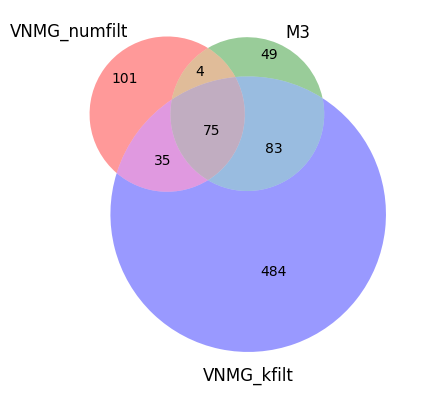

In [481]:
set1 = set(sum(list(map(list,core_bigg)),[]))
set2 = set(sum(list(map(list,M3_bigg)),[]))
set3 = set(sum(list(map(list,VNMG_kfilt_bigg)),[]))

venn3([set1, set2, set3], ('VNMG_numfilt', 'M3', 'VNMG_kfilt'))

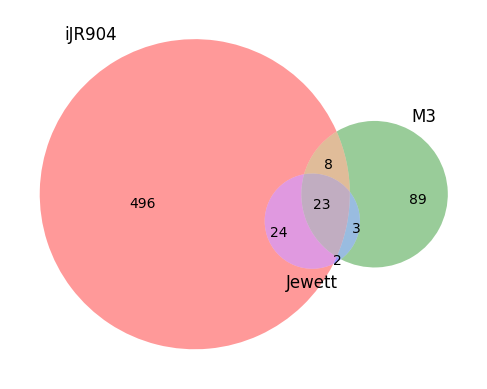

In [263]:
set1 = set(sum([ast.literal_eval(kegg) if kegg else [] for kegg in big['kegg'].dropna().to_list()],[]))
set2 = set(M3['Reaction ID'].values)
set3 = set(sum([ast.literal_eval(kegg) if kegg else [] for kegg in jewett['kegg'].dropna().to_list()],[]))

venn3([set1, set2, set3], ('iJR904', 'M3', 'Jewett'))

<Axes: >

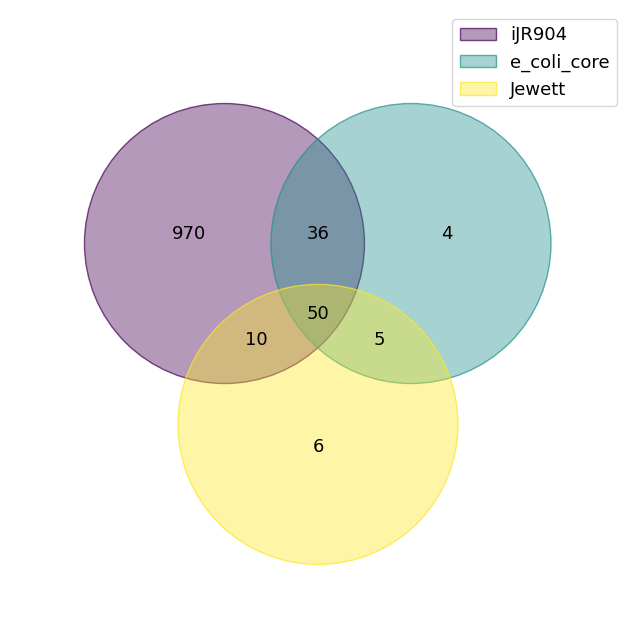

In [224]:
venn({'iJR904': set(big['bigg'].values), 'e_coli_core': set(small['bigg'].values), 'Jewett': set(jewett['bigg'].values)})

In [229]:
from matplotlib_venn import venn3, venn3_circles

TypeError: venn3_circles() missing 1 required positional argument: 'subsets'

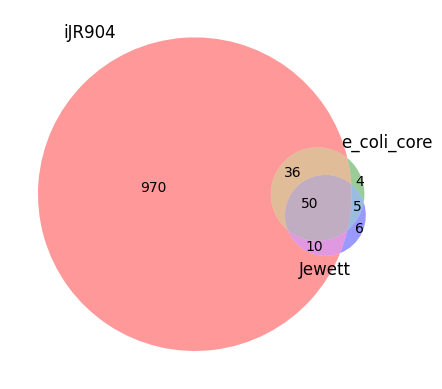

In [231]:
set1 = set(big['bigg'].values)
set2 = set(small['bigg'].values)
set3 = set(jewett['bigg'].values)

venn3([set1, set2, set3], ('iJR904', 'e_coli_core', 'Jewett'))
venn3_circles()

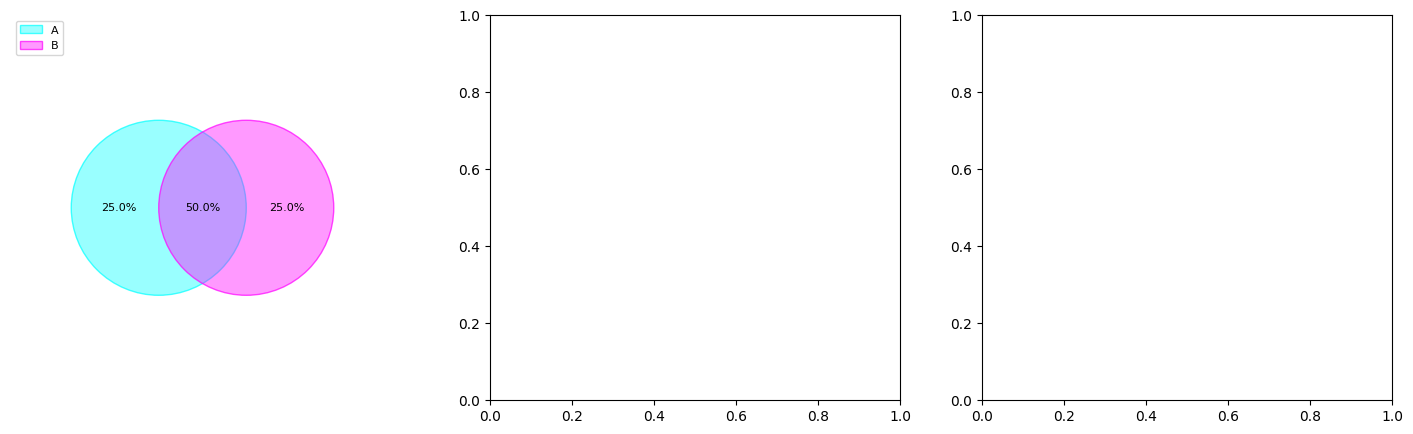

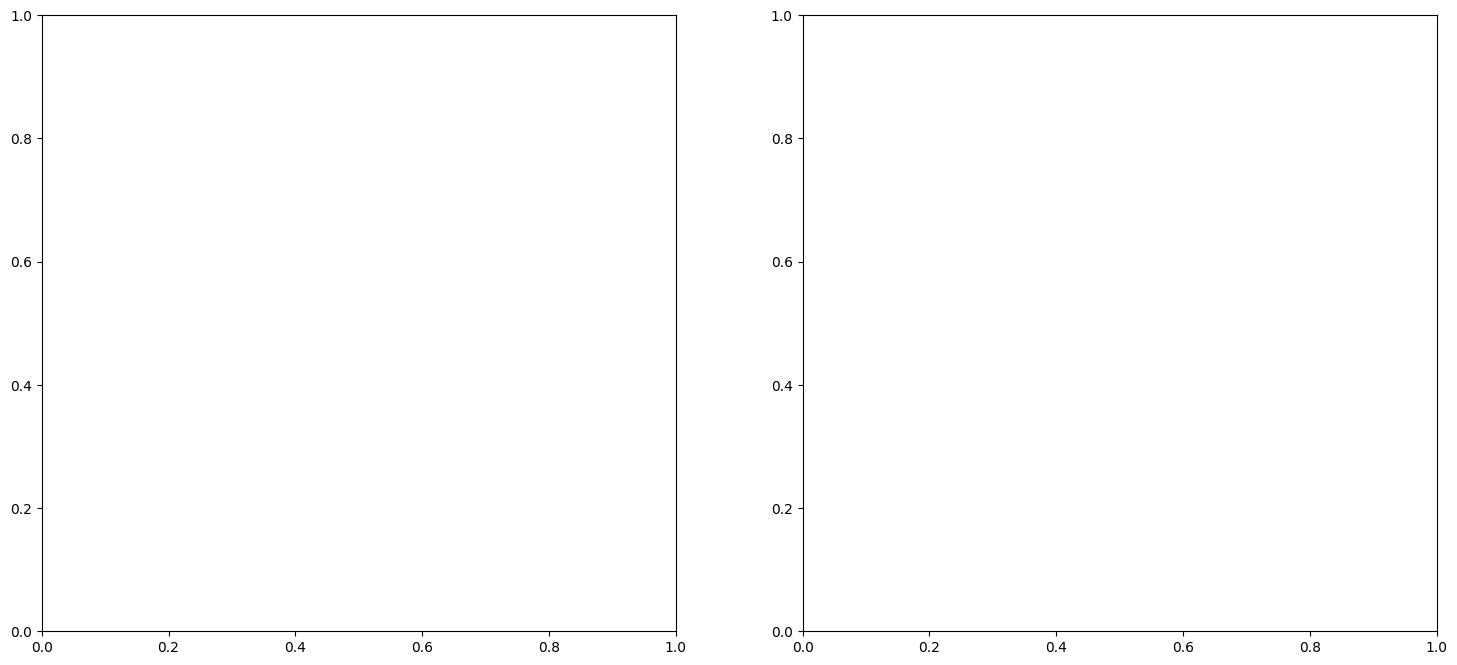

In [11]:
from matplotlib.pyplot import subplots
from itertools import chain, islice
from string import ascii_uppercase
from numpy.random import choice
_, top_axs = subplots(ncols=3, nrows=1, figsize=(18, 5))
_, bot_axs = subplots(ncols=2, nrows=1, figsize=(18, 8))
cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]
letters = iter(ascii_uppercase)
for n_sets, cmap, ax in zip(range(2, 3), cmaps, chain(top_axs, bot_axs)):
    dataset_dict = {
        name: set(choice(5, 3, replace=False))
        for name in islice(letters, n_sets)
    }
    venn(dataset_dict, fmt="{percentage:.1f}%", cmap=cmap, fontsize=8, legend_loc="upper left", ax=ax)

In [12]:
dataset_dict

{'A': {0, 3, 4}, 'B': {0, 1, 3}}